<a href="https://colab.research.google.com/github/PabloDome/Microcopio/blob/main/BobinasHemholtz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

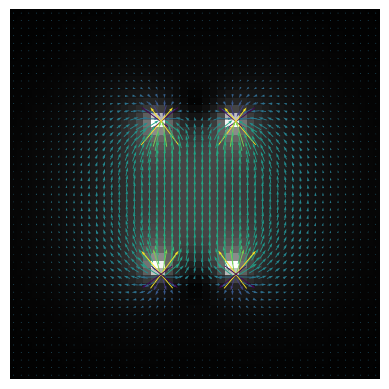

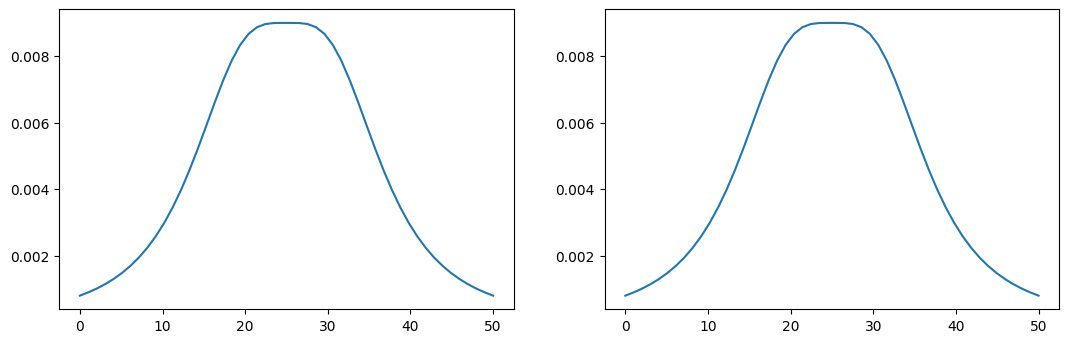

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# Tomo el eje z como el eje de las espiras

e = 0.05 # Diametro del alambre en cm
N_bob = 1 # Cantidad de espiras en el plano xy
N_z = 1 # Cantidad de espiras en el eje z
Rad_bob = 1 # Radio de la bobina interna en cm
Pos_max = 2.5 #Distancia maxima de zoneo en cm
Tam = 50 #Tamaño de la discretización del espacio
I = 1 # Corriente en A

B_x = np.zeros((Tam,Tam))
B_z = np.zeros((Tam,Tam))

Btot_x = np.zeros((Tam,Tam))
Btot_z = np.zeros((Tam,Tam))

B_punto = np.zeros(3)

def BitSabart(I, r, r_bob, Radio_bob): #Es necesario que Radio_bob este en m
  # Por practicidad voy a calcular el campo en xz, pero agregando la linea comentada se puede hacer en 3d
  theta = np.linspace(0, 2*np.pi, num=100, endpoint=True) # num es la cantidad de divisiones de integración
  Bx = -pow(10,-7)*I*np.trapz((r_bob[2]-r[2])*np.cos(theta)/pow((pow(-r[0]+r_bob[0]+Radio_bob*np.cos(theta),2)+
                                                                 pow(-r[1]+r_bob[1]+Radio_bob*np.sin(theta),2)+
                                                                 pow(-r[2]+r_bob[2],2)),3/2), theta)
  #By = pow(10,-7)*I*np.trapz((r_bob[2]-r[2])*np.sin(theta)/pow((pow(-r[0]+r_bob[0]+Radio_bob*np.cos(theta),2)+
  #                                                              pow(-r[1]+r_bob[1]+Radio_bob*np.sin(theta),2)+
  #                                                              pow(-r[2]+r_bob[2],2)),3/2), theta)
  Bz = pow(10,-7)*I*np.trapz(((r_bob[1]-r[1])*np.sin(theta)+(r_bob[0]-r[0])*np.cos(theta)+
                              Radio_bob)/pow((pow(-r[0]+r_bob[0]+Radio_bob*np.cos(theta),2)+
                                              pow(-r[1]+r_bob[1]+Radio_bob*np.sin(theta),2)+
                                              pow(-r[2]+r_bob[2],2)),3/2), theta)

  B = np.array([Bx, 0, Bz])

  return B


def Espira_punto(r, r_bob):

  B_p = B_punto*0

  r_bob_0 = r_bob

  for i in range(N_bob):
    a = (Rad_bob+i*e)/100
    for j in range(N_z):
      r_bob[2] = r_bob_0[2] + j*(e/100)
      B_p = B_p + BitSabart(I, r, r_bob, a)

  return  B_p


def Bobina():
  B_x = np.zeros((Tam,Tam))
  B_z = np.zeros((Tam,Tam))
  Distancia_bobs = Rad_bob*0.5   #Posición de la espira en cm

  r_bob = np.array([0, 0, Distancia_bobs])

  for i in range(Tam):
    for j in range(Tam):
      r = np.array([(i-(Tam-1)*0.5)*2*(Pos_max/100)/Tam, 0, (j-(Tam-1)*0.5)*2*(Pos_max/100)/Tam])
      B_punto = Espira_punto(r, r_bob/100)
      B_x[i,j] = B_punto[0]
      B_z[i,j] = B_punto[2]

  return B_x, B_z

B_x, B_z = Bobina()

for i in range(Tam):
  for j in range(Tam):
    Btot_x[i,j] = B_x[i,j] + B_x[Tam-i-1,Tam-j-1]
    Btot_z[i,j] = B_z[i,j] + B_z[Tam-i-1,Tam-j-1]


Int_Campo = np.sqrt(Btot_x*Btot_x+Btot_z*Btot_z)


x, y = np.meshgrid(np.linspace(0, Tam, Tam), np.linspace(0, Tam, Tam))
plt.quiver(x, y, Btot_x, Btot_z, np.arctan(Btot_z), pivot='mid',color='g')
plt.imshow(abs(Int_Campo*255/np.max(Int_Campo)), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 3)
fig.subplots_adjust(left = 0.0, right=1.0, bottom=0.0, top=1.0, hspace = 0.0, wspace = 0.2)

plt.subplot(1,2,1)
plt.plot(x[int(Tam/2),:], Btot_z[int(Tam/2),:])
plt.subplot(1,2,2)
plt.plot(x[int(Tam/2),:], Btot_z[int(Tam/2),:])
